<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Умножение-признаков-на-обратимую-матрицу" data-toc-modified-id="Умножение-признаков-на-обратимую-матрицу-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Умножение признаков на обратимую матрицу</a></span><ul class="toc-item"><li><span><a href="#Теоритическое-обоснование" data-toc-modified-id="Теоритическое-обоснование-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Теоритическое обоснование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Проверка" data-toc-modified-id="Проверка-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Проверка</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Алгоритм" data-toc-modified-id="Алгоритм-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Алгоритм</a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обоснование</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия-на-исходной-матрице-признаков-X" data-toc-modified-id="Линейная-регрессия-на-исходной-матрице-признаков-X-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия на исходной матрице признаков X</a></span></li><li><span><a href="#Линейная-регрессия-на-преобразованной-матрице-признаков-X_R" data-toc-modified-id="Линейная-регрессия-на-преобразованной-матрице-признаков-X_R-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Линейная регрессия на преобразованной матрице признаков X_R</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Требуется разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
# подготавливаем рабочее пространство,
# загружаем библиотеки
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# загружаем данные,
# выводим информацию по датасету,
# выводим первые 5 строк
data = pd.read_csv('/datasets/insurance.csv')
display(data.info())
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
# проверяем наличие пропусков
print('Кол-во пропусков:\n', data.isna().sum())

Кол-во пропусков:
 Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


In [4]:
# проверяем наличие дубликатов
print('Кол-во абсолютных дубликатов:\n', data.duplicated().sum())

Кол-во абсолютных дубликатов:
 153


In [5]:
# выводим продублированные значения
data_dupl_lst = data.duplicated(keep=False).to_frame().rename(columns={0:'dupl'})
data_dupl = data_dupl_lst[data_dupl_lst['dupl'] == True]
display(data[data.index.isin(data_dupl.index)].sort_values(by='Зарплата', ascending = True))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2955,1,32.0,21600.0,0,0
2988,1,32.0,21600.0,0,0
361,0,50.0,24700.0,1,2
2869,0,50.0,24700.0,1,2
333,0,32.0,25600.0,1,0
4230,0,32.0,25600.0,1,0
1378,0,36.0,26400.0,0,0
2723,0,36.0,26400.0,0,0
1002,1,34.0,26900.0,0,0
1140,1,34.0,26900.0,0,0


In [6]:
# проверяем распределение данных
display(data.describe())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


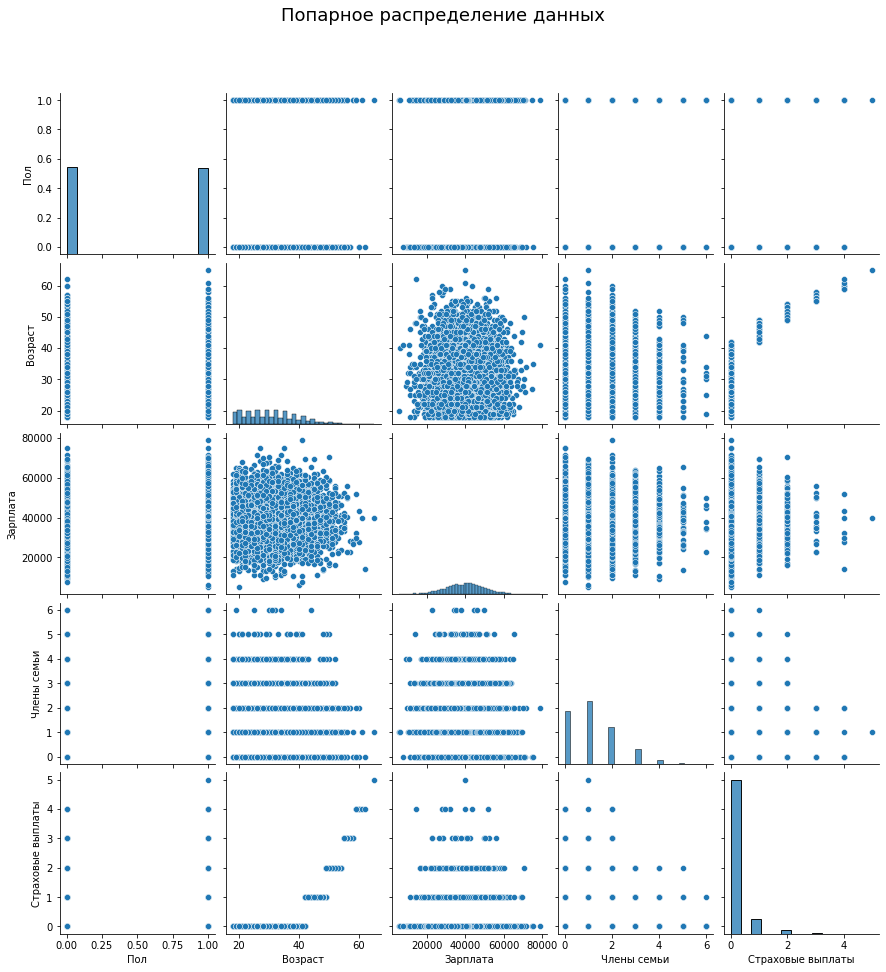

In [7]:
# проверяем попарное распределение данных
g = sns.pairplot(data=data)
g.fig.suptitle('Попарное распределение данных'\
               , y=1.08, fontsize=18);

In [8]:
# проверяем записи с 5 выплатами
display(data[data['Страховые выплаты'] == 5])

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
228,1,65.0,39700.0,1,5


In [9]:
# удаляем единичное значение с 5 страховыми выплатами как аномальное
data = data.drop(index=[228])
data.shape

(4999, 5)

### Выводы
* датасет содержит 5 000 строк и 5 колонок
* данные записаны в ожидаемых форматах
* датасет не имеет пропущенных значений
* датасет содержит 153 строки с абсолютно продублированными записями, но анализ не выявил признаков ошибки - индексы разнесены (скорее всего записи вносили не одна за другой), кол-во обсолютных повторов не больше 2-х, существует высокая вероятность, что в списки попали люди в одном возрасте, с одинаковыми доходами и схожим составом родственников; принято решение не удалять дубликаты
* минимальные, средние, максимальные значения находятся в ожидаемых пределах
* аномальным признано единичное значение 5 страховых выплат; объект удален
* данные имеют разный масштаб, использование модели линейной регрессии потребует стандартизацию
* попарное распределение данных показало явную зависимость целевого признака "кол-во выплат" от признака "возраст"

## Умножение матриц

### Умножение признаков на обратимую матрицу

In [10]:
# строим исходную матрицу признаков
X = data.drop('Страховые выплаты', axis = 1)

# выделяем целевой признак
y = data['Страховые выплаты']

In [11]:
# проверяем размерность
print(X.shape)
print(y.shape)

(4999, 4)
(4999,)


**Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?**

#### Теоритическое обоснование

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — обратимая матрица, на которую умножаются признаки

- $Z$ - матрица, полученная домножением $X$ на $P$

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $w*$ - вектор весов линейной регрессии матрицы, полученной домножением исходной на обратимую матрицу(нулевой элемент равен сдвигу)

- $a$ - предсказания по исходной матрице признаков

- $a*$ - предсказания по матрице полученной домноженной на обратимую матрицу

**Исходная матрица признаков $X$**

Предсказания:

$$
a = Xw
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Новая матрица признаков $Z$**

$$
Z = XP\\(1.1)
$$

Предсказания:

$$
a* = Zw*\\(1.2)
$$

Формула обучения:

$$
w* = (Z^T Z)^{-1} Z^T y\\(1.3)
$$

Подставим уравнение $1.2$ в правую часть уравнения $1.3$:

$$
a* = Z (Z^T Z)^{-1} Z^T y\\(1.4)
$$

Заменим все $Z$ правой частью уравнения $1.1$

$$
a* = XP ((XP)^T (XP))^{-1} (XP)^T y\\(1.5)
$$

Раскроем $(XP)^T$:

$$
a* = XP (P^T X^T XP)^{-1} P^T X^T y\\(1.6)
$$

В следующем шаге используем свойство обратной матрицы: "Матрица, обратная к произведению матриц, равна произведению обратных матриц, взятых в обратном порядке."

$$
(ABC)^{-1} = C^{-1} B^{-1} A^{-1}
$$

Принимаем, что: $A = P^T, B = X^T X, C = P$.

Тогда:

$$
a* = XP (P^T X^T XP)^{-1} P^T X^T y\\
= XP P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y\\
(1.7)
$$

Умножение приводит к:

$$
P P^{-1} = E\\
(P^T)^{-1}  P^T = E\\
(X^T X)^{-1} X^T y = w
$$

Проверим, что осталось от уравнения $1.7$

$$
a* = X E E w\\
= X w\\
= a\\
(1.8)
$$

Получили формулу для $a*$ которая полностью совпадает с формулой для $a$.

#### Вывод
* Независимо от того, какую метрику будем использовать, значения метрик и качество линейной регрессии при умножении признаков на обратимую матрицу не изменятся

#### Проверка

* Создададим различные варианты обратимых матриц для дальнейшего домножения на X
* Проверим метрику R2

Обратимые матрицы:

- $E$ - единичная матрица
- $R$ - рандомная(обратимая) матрица
- $Q$ - матрица полученная $X.T@X$

In [12]:
# создеам единичную матрицу,
# производим умножение
E = np.eye(4)
X_E = X.dot(E)
X_E.shape

(4999, 4)

In [13]:
# создаем рандомную обратимую матрицу,
# производим умножение
np.random.seed(0)
R = []
for i in range(4):
    vector = np.random.rand(4)
    R.append(vector)
    
R = np.array(R)

X_R = X.dot(R)
X_R.shape

(4999, 4)

In [14]:
# преобразуем исходную матрицу,
# производим умножение
Q = X.T @ X
X_Q = X.dot(Q)
X_Q.shape

(4999, 4)

In [15]:
# создаем функцию проверки матрицы на обратимость 
def error_inv(X, name):
    try: 
        np.linalg.inv(X)
        print("Матрица", name, "обратима, детерминант = ", np.linalg.det(X))
    except np.linalg.LinAlgError:
        try:
            print("Матрица", name, "необратима, детерминант = ", np.linalg.det(X))
        except:
            print("Матрица", name\
                  , "не удовлетваоряет требованиям к обратимой матрице, возможно не квадратная!")

In [16]:
# проверяем созданные матрицы на обратимость
error_inv(X, name = 'X')
error_inv(E, name = 'E')
error_inv(R, name = 'R')
error_inv(Q, name = 'Q')

Матрица X не удовлетваоряет требованиям к обратимой матрице, возможно не квадратная!
Матрица E обратима, детерминант =  1.0
Матрица R обратима, детерминант =  0.1393885146242566
Матрица Q обратима, детерминант =  4.361830156699929e+25


In [17]:
# создаем фукнцию обучения модели на разных матрицах признаков,
# и расчета метрики R2
def R2(X, y, name):
    model = LinearRegression()
    model.fit(X,y)
    predict = model.predict(X)
    return print("Метрика R2 для матрицы", name, "равна", r2_score(y, predict))

In [18]:
# обучаем модель,
# рассчитываем метрику R2
R2(X,y,name = 'X')
R2(X,y,name = 'X_E')
R2(X,y,name = 'X_R')
R2(X,y,name = 'X_Q')

Метрика R2 для матрицы X равна 0.4246420350488802
Метрика R2 для матрицы X_E равна 0.4246420350488802
Метрика R2 для матрицы X_R равна 0.4246420350488802
Метрика R2 для матрицы X_Q равна 0.4246420350488802


### Вывод
* разбор формул и практическая проверка подтвердили, что умножение признаков на обратимую матрицу не влияет на качество линейной регрессии

## Алгоритм преобразования

### Алгоритм

Для защиты персональных данных предлагается умножить исходную матрицу признаков на обратимую матрицу $R$, сгенерированную случайным образом (матрица **X_R**).

### Обоснование

Использование доказанного выше свойства умножения признаков на обратимую матрицу позволит:
* исказить или "закодировать" персональные данные, хранящиеся в исходной матрице признаков
* получить идентичный исходной матрице результат работы модели линейной регрессии с сохранением качества

## Проверка алгоритма

In [19]:
# выводим данные до преобразования и после
display(X.head())
display(X_R.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


,0,1,2,3
0,47816.159626,19046.821778,39288.176764,26270.382725
1,36639.241064,14601.414441,30105.751495,20139.115638
2,20249.203960,8071.002825,16638.915829,11132.654732
3,40194.769953,16004.926305,33024.265492,22073.819645
4,25164.009197,10026.623866,20676.878699,13829.671933


* **данные потеряли свои оригинальные значения, теперь в них хранится непонятное число**

### Линейная регрессия на исходной матрице признаков X

In [20]:
# разделяем данные на обучающую и валидационную выборки в пропорции 75х25
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state= 0)

In [21]:
# проверяем количество измерений в выборках
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(3749, 4)
(3749,)
(1250, 4)
(1250,)


In [22]:
# стандартизируем данные методом StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_valid_st = scaler.transform(X_valid)

In [23]:
# задаем алгоритм и обучаем модель
model_X = LinearRegression()
model_X.fit(X_train_st, y_train)

LinearRegression()

In [24]:
# делаем предсказания обученной моделью
predictions_X = model_X.predict(X_valid_st)

In [25]:
# проверяем метрику R2 на валидационной выборке
print("X valid R2: {}".format(r2_score(y_valid, predictions_X)))

X valid R2: 0.42571751351618625


### Линейная регрессия на преобразованной матрице признаков X_R

In [26]:
# разделяем данные на обучающую и валидационную выборки в пропорции 75х25
X_R_train, X_R_valid, y_train, y_valid = train_test_split(X_R, y, test_size=0.25, random_state= 0)

In [27]:
# проверяем количество измерений в выборках
print(X_R_train.shape)
print(y_train.shape)
print(X_R_valid.shape)
print(y_valid.shape)

(3749, 4)
(3749,)
(1250, 4)
(1250,)


In [28]:
# стандартизируем данные методом StandartScaler
scaler = StandardScaler()
scaler.fit(X_R_train)
X_R_train_st = scaler.transform(X_R_train)
X_R_valid_st = scaler.transform(X_R_valid)

In [29]:
# задаем алгоритм и обучаем модель
model_X_R = LinearRegression()
model_X_R.fit(X_R_train_st, y_train)

LinearRegression()

In [30]:
# делаем предсказания обученной моделью
predictions_X_R = model_X_R.predict(X_R_valid_st)

In [31]:
# проверяем метрику R2 на валидационной выборке
print("X_R valid R2: {}".format(r2_score(y_valid, predictions_X_R)))

X_R valid R2: 0.4257175135162612


### Выводы

алгоритм умножения исходной матрицы признаков на случайную обратимую матрицу позволил:
* закодировать персональные данные
* решить задачу регрессии на закодированных данных без потери качества (метрика R2)